In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
folder = "C:\\Users\\zuk-8\\Programs\\workspace\\jupiter_notebooks\\Andrea"
fn = "fanta_grades.csv"

In [3]:
# Set canceled matches to NaN
grades = pd.read_csv(os.path.join(folder,fn))
n_players = grades.groupby(["Season", "Giornata", "Team"]).count()["Player"]
canceled_matches = n_players.loc[n_players>15].reset_index()[["Season", "Giornata", "Team"]]

del_index = []
for row in canceled_matches.index:
    ser = canceled_matches.loc[row]
    s, g, t = ser.loc['Season'], ser.loc['Giornata'], ser.loc['Team']
    del_index += grades.query("Season == @s").query("Giornata == @g").query("Team == @t").index.tolist()

grades.set_value(index=del_index, col=["V", "G", "A", "R", "R", "AG", "AM", "ES", "FV"], value=pd.np.NaN)
grades[grades.index.isin(del_index)].head()

grades = grades.rename(columns={'FV':'FantaVoto', 'V':'Voto'})
grades_n = grades.loc[grades['Role']!='P']
grades_p = grades.loc[grades['Role']=='P']
# grades = grades.set_index(["Season", "Giornata", "Team", "Role", "Player"])

In [4]:
grades

Season  Giornata      Team           Player    A   AG   AM  ES  \
0        2014         1  atalanta    Sportiello M.  NaN  NaN  NaN NaN   
1        2014         1  atalanta    Benalouane Y.  NaN  NaN  NaN NaN   
2        2014         1  atalanta         Biava G.  NaN  NaN  NaN NaN   
3        2014         1  atalanta        Drame' B.  NaN  NaN  1.0 NaN   
4        2014         1  atalanta    Zappacosta D.  NaN  NaN  NaN NaN   
5        2014         1  atalanta       Carmona C.  NaN  NaN  NaN NaN   
6        2014         1  atalanta      Cigarini L.  NaN  NaN  NaN NaN   
7        2014         1  atalanta       Moralez M.  NaN  NaN  NaN NaN   
8        2014         1  atalanta  Estigarribia M.  NaN  NaN  NaN NaN   
9        2014         1  atalanta         Denis G.  NaN  NaN  NaN NaN   
10       2014         1  atalanta    Spinazzola L.  NaN  NaN  NaN NaN   
11       2014         1  atalanta        Boakye R.  NaN  NaN  1.0 NaN   
12       2014         1  atalanta       Bianchi R.  NaN  NaN  NaN NaN   
13       2014         1  cagliari       Colombi S.  NaN  NaN  NaN NaN   
14       2014         1  cagliari        Pisano F.  NaN  NaN  NaN NaN   
15       2014         1  cagliari        Avelar D.  NaN  NaN  NaN NaN   
16       2014         1  cagliari    Ceppitelli L.  NaN  NaN  NaN NaN   
17       2014         1  cagliari    Rossettini L.  NaN  NaN  NaN NaN   
18       2014         1  cagliari      Crisetig L.  NaN  NaN  NaN NaN   
19       2014         1  cagliari         Conti D.  NaN  NaN  1.0 NaN   
20       2014         1  cagliari         Cossu A.  NaN  NaN  NaN NaN   
21       2014         1  cagliari         Ekdal A.  NaN  NaN  NaN NaN   
22       2014         1  cagliari        Farias D.  NaN  NaN  NaN NaN   
23       2014         1  cagliari           Sau M.  NaN  NaN  NaN NaN   
24       2014         1  cagliari       Balzano A.  1.0  NaN  1.0 NaN   
25       2014         1  cagliari         Murru N.  NaN  NaN  NaN NaN   
26       2014         1  cagliari         Longo S.  NaN  NaN  NaN NaN   
27       2014         1    cesena         Leali N.  NaN  NaN  NaN NaN   
28       2014         1    cesena      Renzetti F.  NaN  NaN  NaN NaN   
29       2014         1    cesena       Capelli D.  NaN  NaN  NaN NaN   
...       ...       ...       ...              ...  ...  ...  ...  ..   
32263    2016        38  sassuolo       Berardi D.  NaN  NaN  NaN NaN   
32264    2016        38  sassuolo      Iemmello P.  NaN  NaN  NaN NaN   
32265    2016        38    torino          Hart J.  NaN  NaN  NaN NaN   
32266    2016        38    torino  De Silvestri L.  NaN  NaN  NaN NaN   
32267    2016        38    torino       Barreca A.  NaN  NaN  NaN NaN   
32268    2016        38    torino    Rossettini L.  NaN  NaN  1.0 NaN   
32269    2016        38    torino       Moretti E.  NaN  NaN  NaN NaN   
32270    2016        38    torino        Acquah A.  NaN  NaN  NaN NaN   
32271    2016        38    torino    Valdifiori M.  NaN  NaN  NaN NaN   
32272    2016        38    torino       Baselli D.  NaN  NaN  NaN NaN   
32273    2016        38    torino       Belotti A.  1.0  NaN  NaN NaN   
32274    2016        38    torino     Gustafson S.  NaN  NaN  NaN NaN   
32275    2016        38    torino           Obi J.  NaN  NaN  NaN NaN   
32276    2016        38    torino          Iago F.  NaN  NaN  NaN NaN   
32277    2016        38    torino        Iturbe J.  NaN  NaN  NaN NaN   
32278    2016        38    torino          Boye L.  NaN  NaN  1.0 NaN   
32279    2016        38   udinese       Scuffet S.  NaN  NaN  NaN NaN   
32280    2016        38   udinese       Angella G.  NaN  1.0  NaN NaN   
32281    2016        38   udinese        Felipe D.  1.0  NaN  NaN NaN   
32282    2016        38   udinese      Heurtaux T.  NaN  NaN  NaN NaN   
32283    2016        38   udinese        Widmer S.  NaN  NaN  1.0 NaN   
32284    2016        38   udinese  Hallfredsson E.  NaN  NaN  NaN NaN   
32285    2016        38   udinese        Jankto J.  NaN  NaN  NaN

In [4]:
# # Check data is correct
# mult_n = pd.Series({'V':1, 'G':3, 'A':1, 'R':0, 'RS':-3, 'AG':-2, 'AM':-0.5, 'ES':-1, 'FV':-1})
# mult_p = pd.Series({'V':1, 'G':1, 'A':1, 'R':3, 'RS':3, 'AG':-1, 'AM':-0.5, 'ES':-1, 'FV':-1})
# pd.concat([grades_n.loc[(grades_n.fillna(0) * mult_n).sum(1) > 0.001],
#            grades_n.loc[(grades_n.fillna(0) * mult_n).sum(1) < -0.001]])
# pd.concat([grades_p.loc[(grades_p.fillna(0) * mult_p).sum(1) > 0.001],
#            grades_p.loc[(grades_p.fillna(0) * mult_p).sum(1) < -0.001]])

C:\Users\zuk-8\Programs\Anaconda3\envs\standard\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


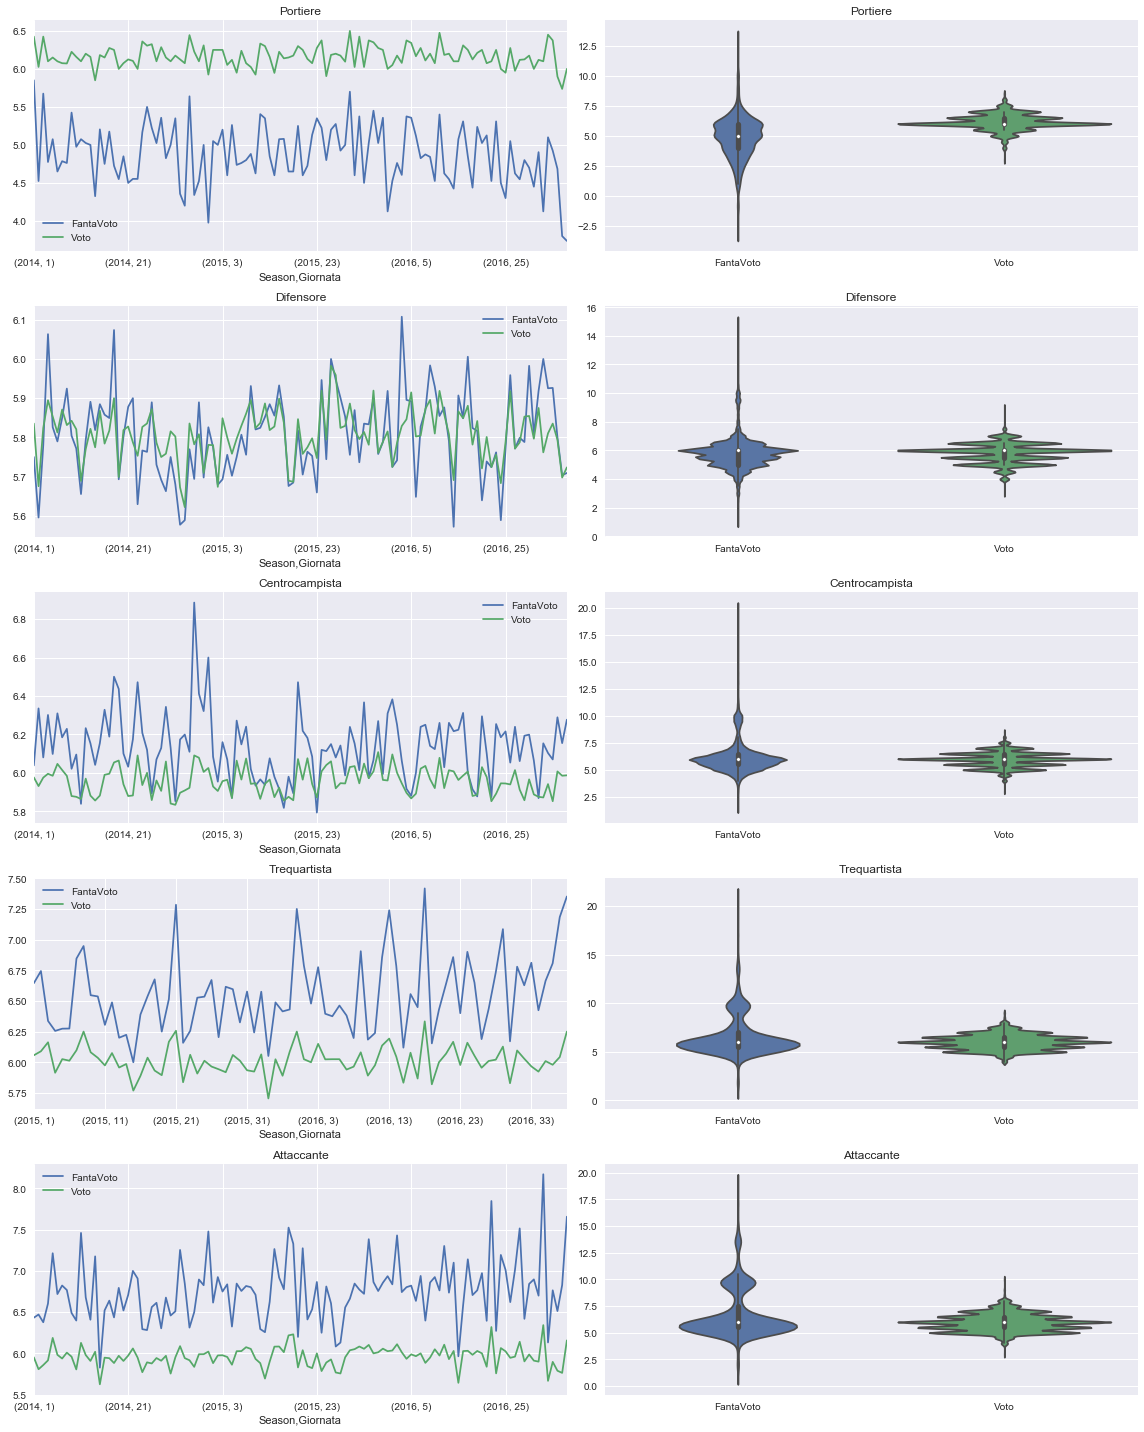

In [7]:
# Roles
grades_by_rg = grades.groupby(['Role', 'Season', 'Giornata']).mean()[['FantaVoto', 'Voto']]
grades_by_rgp = grades.groupby(['Role', 'Season', 'Giornata', 'Player']).mean()[['FantaVoto', 'Voto']]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
grades_by_rg.loc['P'].plot(ax=axes[0,0])
grades_by_rg.loc['D'].plot(ax=axes[1,0])
grades_by_rg.loc['C'].plot(ax=axes[2,0])
grades_by_rg.loc['T'].plot(ax=axes[3,0])
grades_by_rg.loc['A'].plot(ax=axes[4,0])

sns.violinplot(grades_by_rgp.loc['P'], ax=axes[0,1])
sns.violinplot(grades_by_rgp.loc['D'], ax=axes[1,1])
sns.violinplot(grades_by_rgp.loc['C'], ax=axes[2,1])
sns.violinplot(grades_by_rgp.loc['T'], ax=axes[3,1])
sns.violinplot(grades_by_rgp.loc['A'], ax=axes[4,1])

axes[0,0].set_title('Portiere')
axes[1,0].set_title('Difensore')
axes[2,0].set_title('Centrocampista')
axes[3,0].set_title('Trequartista')
axes[4,0].set_title('Attaccante')
axes[0,1].set_title('Portiere')
axes[1,1].set_title('Difensore')
axes[2,1].set_title('Centrocampista')
axes[3,1].set_title('Trequartista')
axes[4,1].set_title('Attaccante')

plt.tight_layout()

In [38]:
class Player(object):
    
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return '<Player: {n}: {r} at {t}>'.format(n=self.name, r=self.role, t=self.teams[-1])
    
    @property
    def _data_player(self):
        name = self.name
        return grades.query('Player == @name')
    
    @property
    def teams(self):
        return self._data_player.Team.unique().tolist()
    
    @property
    def role(self):
        return self._data_player.Role.unique().tolist()[0]
    
    @property
    def _grades(self):
        return self._data_player.set_index(['Season', 'Giornata'])[['Voto', 'G', 'A', 'R', 'RS', 'AG', 'AM', 'ES', 'FantaVoto']]

    @property
    def grades(self):
        return self._grades['Voto']

    @property
    def fantagrades(self):
        return self._grades['FantaVoto']

    @property
    def all_grades(self):
        return self._grades[['Voto', 'FantaVoto']]
    
    def plot(self, propert, *args, **kwargs):
        title = self.__repr__()[1:-1]
        lines = getattr(self, propert)
        return lines.plot(title=title, *args, **kwargs)


<Player: Gastaldello D.: D at bologna>


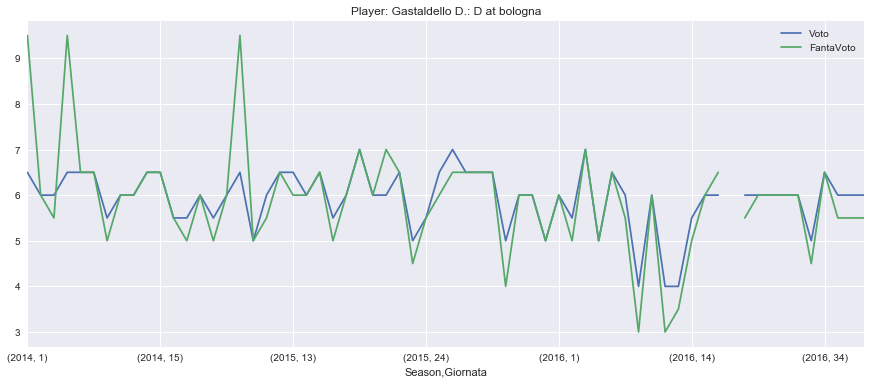

In [40]:
pl = Player('Gastaldello D.')
print(pl)
ax = pl.plot('all_grades', figsize=(15,6))